# Feature Engineering Assignments

**Today's Exercises:**
- Feature Scaling & Transformation
- Feature Encoding (Categorical Data)
- Feature Cleaning & Imputation

### Importing Libraries & Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
%matplotlib inline
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning/Datasets/stackoverflow.csv')



In [ ]:
df.head(2)

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"


# Data Exploration


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [ ]:
df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,6.650000e+02,487.000000,999.000000,999.000000
mean,9.256517e+04,7.061602,36.003003,9.961962
std,2.091344e+05,2.621591,13.255127,4.878129
min,0.000000e+00,0.000000,18.000000,0.000000
25%,2.755000e+04,5.000000,25.000000,7.000000
50%,5.556200e+04,7.000000,35.000000,10.000000
75%,8.823800e+04,10.000000,45.000000,13.000000
max,2.000000e+06,10.000000,83.000000,27.000000


## let's define numaric and catgorical variables 

In [ ]:
df_num = df[['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience']]
df_cat = df[['FormalEducation' , 'Country' ,'VersionControl' ,'Gender'  ]]

In [ ]:
numric_col = df.describe().columns
numric_col

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')

##  plot distruptoion  for numiric values 

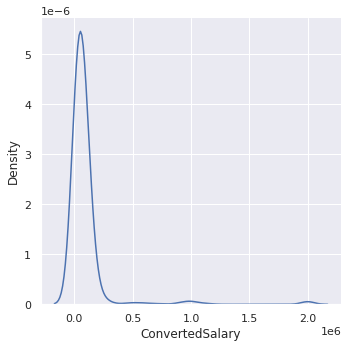

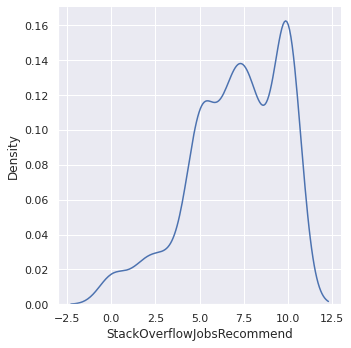

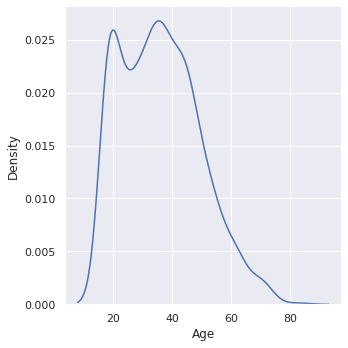

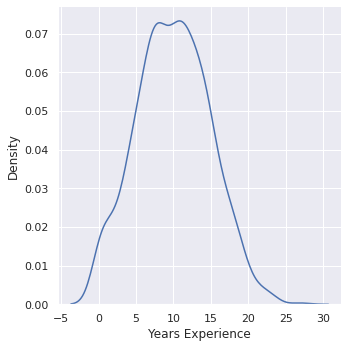

In [ ]:

df_num = df[['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience']]
for i in df_num:
  sns.displot(df_num[i] , kind='kde')

  plt.show()


## Explore some corlaetion between Numric variables

In [ ]:
df_num.corr()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
ConvertedSalary,1.000000,0.016009,0.023813,0.008828
StackOverflowJobsRecommend,0.016009,1.000000,-0.009689,0.059275
Age,0.023813,-0.009689,1.000000,-0.009823
Years Experience,0.008828,0.059275,-0.009823,1.000000


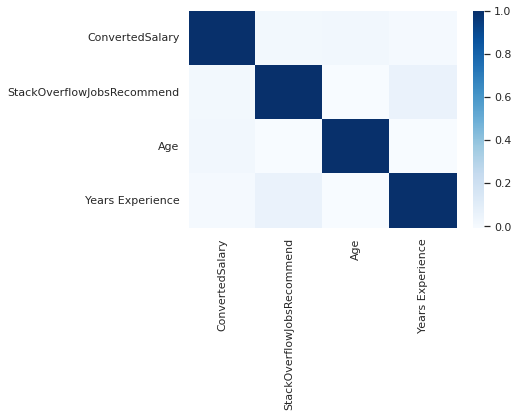

In [ ]:
sns.heatmap(df_num.corr() , cmap='Blues');

In [ ]:
df['Gender'].value_counts()

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming                              1
Name: Gender, dtype: int64

In [ ]:
# mapping gender column
df['Gender_Numeric'] = df['Gender'].apply(lambda x: 0if x == "Male" else(1 if x=='Female' else '-1'))
df['Gender_Numeric'].value_counts()

0     632
-1    314
1      53
Name: Gender_Numeric, dtype: int64

In [ ]:
np.round(pd.pivot_table(df,index = 'Gender_Numeric',values=[ 'Years Experience' , 'ConvertedSalary' ]) , decimals=0)

,ConvertedSalary,Years Experience
Gender_Numeric,,
0,98380.0,10.0
1,75614.0,11.0
-1,83515.0,10.0


## Explore catgorical variables


In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == "Male" else("Female" if x=='Female' else 'Other'))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


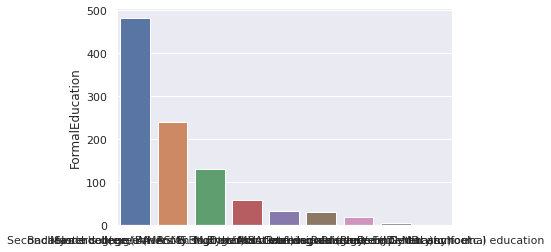

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


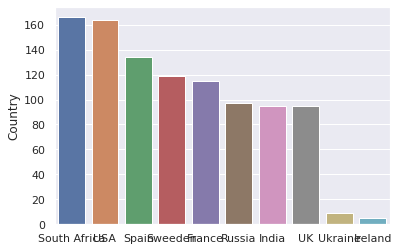

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


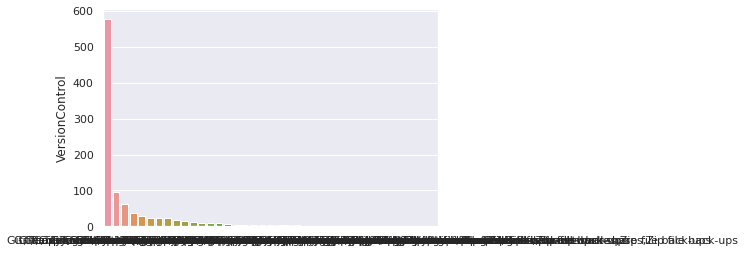

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


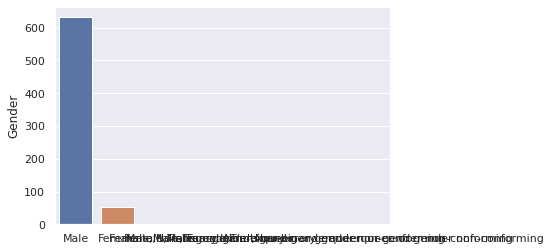

In [ ]:
for i in df_cat:
  sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())
  plt.show()
  

==========

## Feature Cleaning & Imputation Exercises

#### Check for any missing data 

In [ ]:
df.isnull().sum()

SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
Country                         0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                          0
RawSalary                     334
Gender_Numeric                  0
dtype: int64

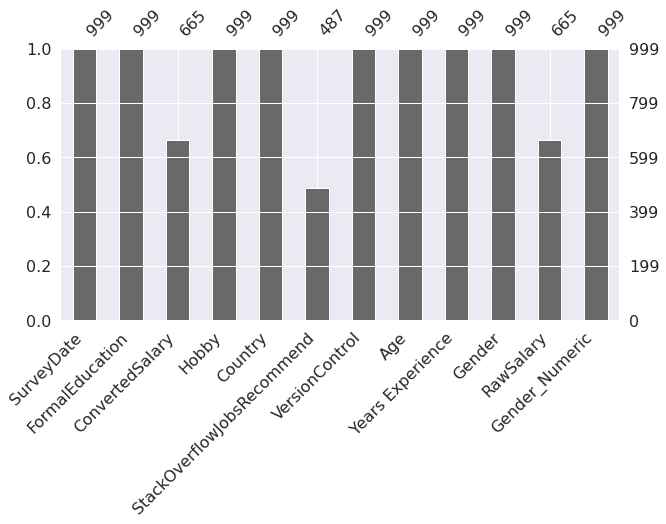

In [ ]:
msn.bar(df , figsize=(10,5));

### Caluclting precntage of missing values

In [ ]:
df["StackOverflowJobsRecommend"].isnull().sum()/df.shape[0]*100

51.25125125125125

In [ ]:
df['ConvertedSalary'].isnull().sum()/df.shape[0]*100

33.433433433433436

In [ ]:
df['RawSalary'].isnull().sum()/df.shape[0]*100

33.433433433433436

In [ ]:
#check raw salary data types
df['RawSalary'].dtype

dtype('O')

In [ ]:
df['RawSalary'].value_counts()

120,000.00    10
130,000.00     7
110,000.00     6
70,000.00      6
140,000.00     6
              ..
28,958.00      1
£63,642.00     1
£63,156.00     1
20,244.00      1
54,000.00      1
Name: RawSalary, Length: 515, dtype: int64

## Imputing Missing values 

In [ ]:

df['RawSalary'] = df['RawSalary'].replace({'\$':'', ',':'','£':'' ,'$':''} ,regex=True)


In [ ]:
df['RawSalary'].value_counts()

120000.00    10
75000.00      9
130000.00     9
60000.00      8
110000.00     7
             ..
106000.00     1
13848.00      1
46200.00      1
6732.00       1
67368.00      1
Name: RawSalary, Length: 446, dtype: int64

In [ ]:
df['RawSalary'].isnull().sum()

334

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
Regrssor = IterativeImputer(estimator=ExtraTreesRegressor(),random_state=42 , max_iter=10)
Ittimputer= Regrssor.fit_transform(df[['RawSalary' ,'ConvertedSalary']])
Ittimputer

array([[  92611.24,   92652.68],
       [  70841.  ,   70841.  ],
       [  92611.24,   92652.68],
       ...,
       [  55000.  ,   55000.  ],
       [  92611.24,   92652.68],
       [1000000.  , 1000000.  ]])

In [ ]:
df['ImputedRawSalary']= Ittimputer[:, 0]
df['ImputedRawSalary']

0        92611.24
1        70841.00
2        92611.24
3        21426.00
4        41671.00
          ...    
994      92611.24
995      58746.00
996      55000.00
997      92611.24
998    1000000.00
Name: ImputedRawSalary, Length: 999, dtype: float64

In [ ]:
from sklearn.impute import KNNImputer
model = KNNImputer(n_neighbors=3)
imputed_Array = model.fit_transform(df_num)
imputed_Array

array([[4.32876667e+04, 5.66666667e+00, 2.10000000e+01, 1.30000000e+01],
       [7.08410000e+04, 7.00000000e+00, 3.80000000e+01, 9.00000000e+00],
       [1.46491333e+05, 8.00000000e+00, 4.50000000e+01, 1.10000000e+01],
       ...,
       [5.50000000e+04, 6.33333333e+00, 5.40000000e+01, 1.60000000e+01],
       [8.65046667e+04, 8.33333333e+00, 2.30000000e+01, 9.00000000e+00],
       [1.00000000e+06, 6.33333333e+00, 1.80000000e+01, 7.00000000e+00]])

In [ ]:
imputed_num_df = pd.DataFrame(imputed_Array , columns=['ConvertedSalary','StackOverflowJobsRecommend',	'Age',	'Years Experience'])
np.round(imputed_num_df ,decimals=2)

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,43287.67,5.67,21.0,13.0
1,70841.00,7.00,38.0,9.0
2,146491.33,8.00,45.0,11.0
3,21426.00,8.00,46.0,12.0
4,41671.00,8.00,39.0,7.0
...,...,...,...,...
994,46424.67,8.00,45.0,10.0
995,58746.00,8.00,27.0,16.0
996,55000.00,6.33,54.0,16.0
997,86504.67,8.33,23.0,9.0


In [ ]:
imputed_num_df['imputed_RawSalary'] = Ittimputer[:, 0]
np.round(imputed_num_df ,decimals=2)

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,imputed_RawSalary
0,43287.67,5.67,21.0,13.0,92611.24
1,70841.00,7.00,38.0,9.0,70841.00
2,146491.33,8.00,45.0,11.0,92611.24
3,21426.00,8.00,46.0,12.0,21426.00
4,41671.00,8.00,39.0,7.0,41671.00
...,...,...,...,...,...
994,46424.67,8.00,45.0,10.0,92611.24
995,58746.00,8.00,27.0,16.0,58746.00
996,55000.00,6.33,54.0,16.0,55000.00
997,86504.67,8.33,23.0,9.0,92611.24


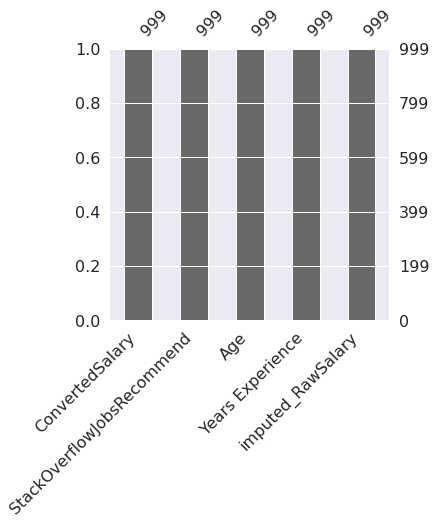

In [ ]:
msn.bar(imputed_num_df , figsize=(5,5));

#Detcting outliers Visualy 
 

## Univariate

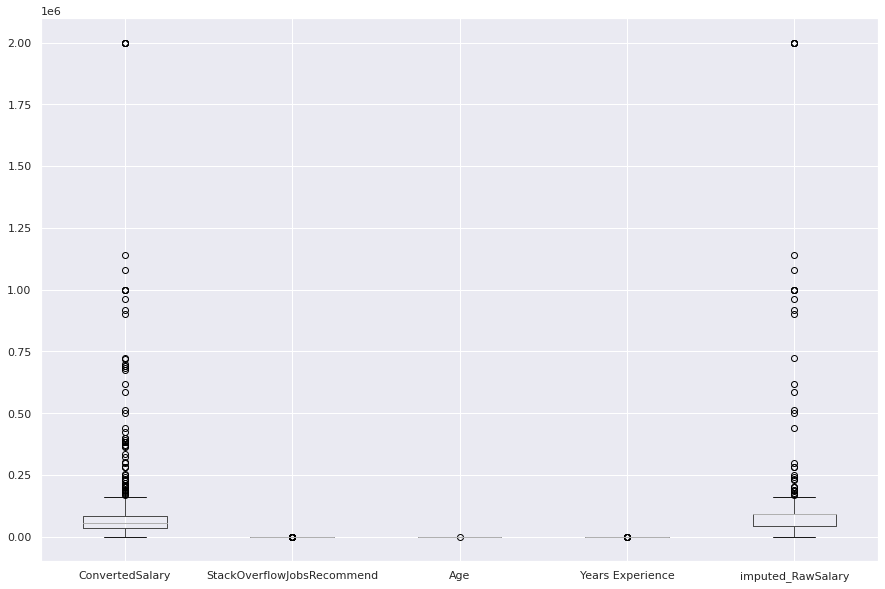

In [ ]:
plt.figure(figsize=(15,10))
imputed_num_df.boxplot();
plt.show()

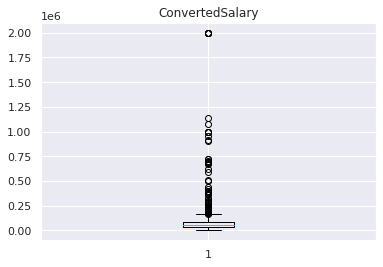

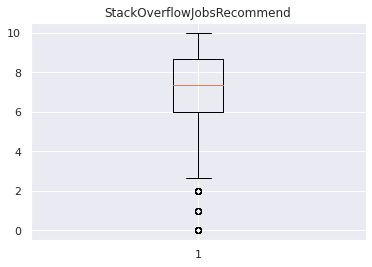

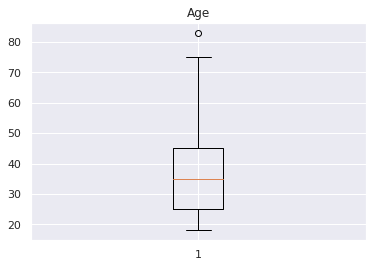

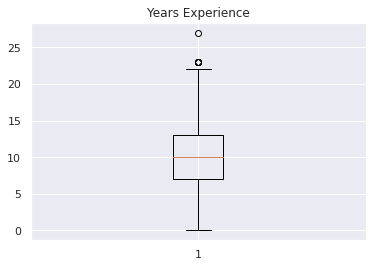

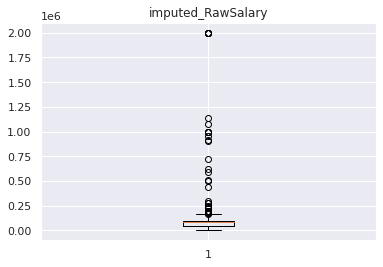

In [ ]:
for i in imputed_num_df:
  plt.boxplot(imputed_num_df[i])
  plt.title(i)
  plt.show()

#Multivruate exploration

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

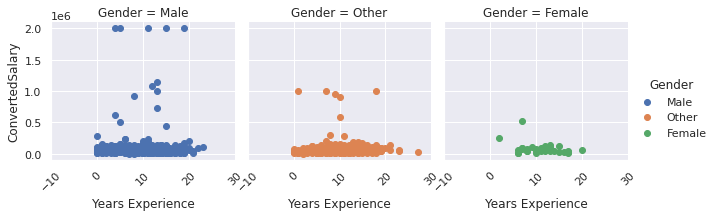

In [ ]:

g = sns.FacetGrid(df , col ='Gender' , hue= 'Gender')
g.map(plt.scatter,'Years Experience' ,'ConvertedSalary' )
g.set_xticklabels(rotation=45)
g.add_legend()


In [ ]:
#df['Gender'].value_counts().index

Index(['Male', 'Other', 'Female'], dtype='object')

In [ ]:
#g= sns.catplot(x="index", y="vals", hue='cols', data=df, kind='point')

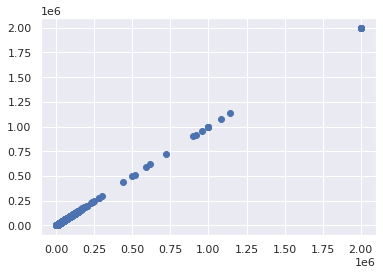

In [ ]:
plt.scatter(df['RawSalary'] ,df['ConvertedSalary'])

# Now let's apply Isoaltion forest to detect the indexs of outliers

In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination = .12)
predections = clf.fit_predict(imputed_num_df[['imputed_RawSalary' ,'ConvertedSalary']])


In [ ]:
anom = np.where(predections<0)
anom

(array([  7,   9,  14,  19,  20,  68,  71,  72,  90,  93, 116, 127, 136,
        138, 147, 167, 169, 170, 178, 192, 199, 202, 205, 214, 227, 234,
        241, 245, 251, 261, 280, 285, 305, 313, 319, 321, 351, 358, 363,
        374, 380, 385, 388, 393, 399, 401, 402, 404, 407, 408, 412, 413,
        420, 424, 425, 431, 439, 458, 468, 482, 484, 485, 486, 488, 495,
        500, 505, 524, 541, 558, 559, 581, 584, 612, 613, 615, 624, 632,
        641, 658, 664, 667, 670, 680, 685, 686, 701, 714, 715, 725, 727,
        732, 752, 769, 773, 780, 782, 805, 822, 828, 833, 834, 835, 836,
        837, 840, 857, 873, 888, 894, 897, 901, 906, 915, 920, 931, 939,
        941, 951, 953, 964, 966, 980, 987, 990, 998]),)

In [ ]:
imputed_num_df.drop([ 7,   9,  14,  19,  20,  68,  71,  72,  76,  90,  93, 116, 127,
        136, 138, 147, 167, 169, 170, 175, 178, 189, 192, 199, 202, 205,
        214, 227, 234, 241, 245, 251, 261, 280, 285, 305, 313, 319, 321,
        333, 351, 352, 358, 363, 374, 380, 385, 388, 393, 399, 401, 402,
        404, 407, 408, 412, 413, 420, 424, 425, 431, 439, 450, 458, 468,
        482, 484, 485, 486, 488, 495, 500, 505, 524, 541, 558, 559, 563,
        578, 581, 583, 584, 607, 612, 613, 615, 623, 624, 625, 632, 633,
        641, 657, 658, 664, 667, 670, 680, 683, 685, 686, 701, 714, 715,
        725, 727, 732, 738, 748, 752, 769, 773, 780, 782, 783, 805, 822,
        828, 833, 834, 835, 836, 837, 840, 843, 844, 857, 873, 888, 894,
        897, 901, 906, 908, 915, 920, 928, 931, 933, 938, 939, 941, 951,
        953, 964, 966, 980, 987, 990, 998] , axis=0 , inplace =True )


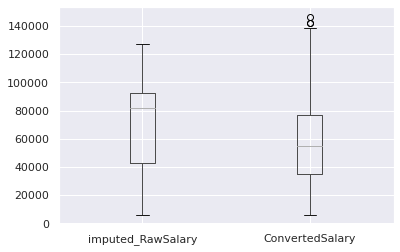

In [ ]:
imputed_num_df[['imputed_RawSalary' ,'ConvertedSalary']].boxplot()

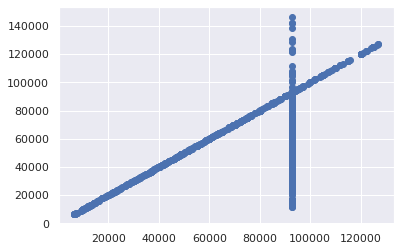

In [ ]:
plt.scatter(imputed_num_df['imputed_RawSalary'] ,imputed_num_df['ConvertedSalary'])

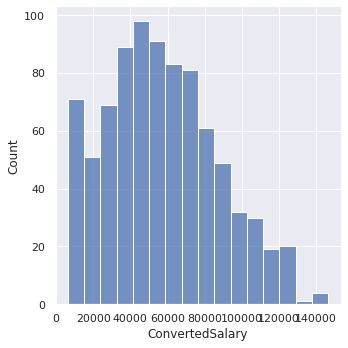

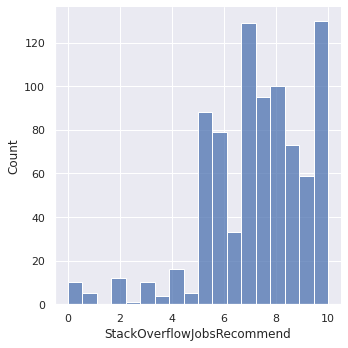

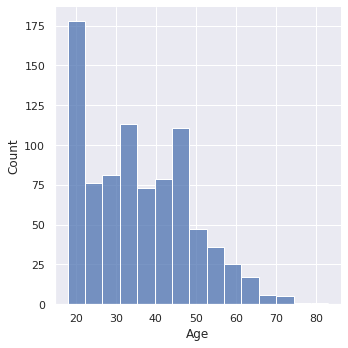

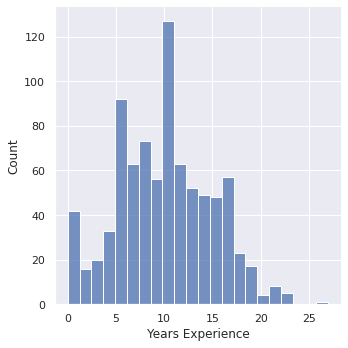

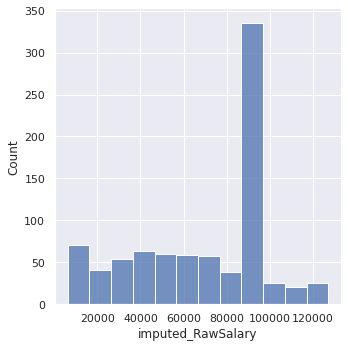

In [ ]:
imputed_num_df[['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience', 'imputed_RawSalary']]
for i in imputed_num_df:
  sns.displot(imputed_num_df[i] , kind='hist')

  plt.show()


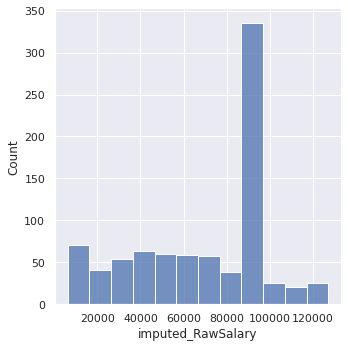

In [ ]:
sns.displot(imputed_num_df['imputed_RawSalary'] , kind='hist')

==========

## Let's scale / normalize the data in the 'Age' column

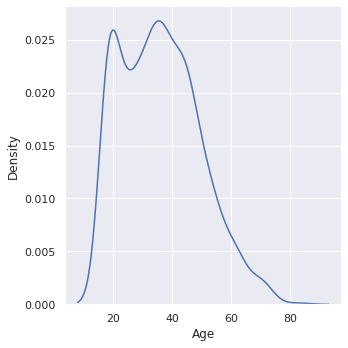

In [ ]:
sns.displot(df['Age'] ,kind='kde');

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_age = sc.fit_transform(imputed_num_df[['Age']])

In [ ]:
imputed_num_df['ScaledAge']= scaled_age 

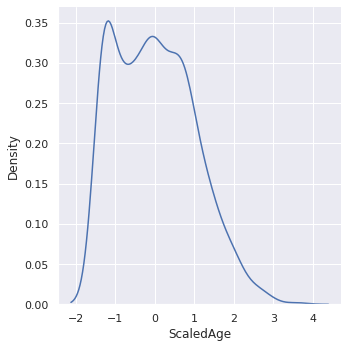

In [ ]:
sns.displot(imputed_num_df['ScaledAge'] ,kind='kde');

In [ ]:
imputed_num_df.head(2)

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,imputed_RawSalary,ScaledAge
0,43287.666667,5.666667,21.0,13.0,92611.24,-1.117003
1,70841.000000,7.000000,38.0,9.0,70841.00,0.179475


==========

## Feature Encoding Exercises

##### Q. How about encoding the data in the 'Hobby' / 'Gender' column

In [ ]:
df['Hobby'].value_counts()

Yes    826
No     173
Name: Hobby, dtype: int64

In [ ]:
# Transfer cloumn datatype fot the perpous of encoding
df['Hobby'].astype('category')

0      Yes
1      Yes
2       No
3      Yes
4      Yes
      ... 
994    Yes
995     No
996    Yes
997    Yes
998     No
Name: Hobby, Length: 999, dtype: category
Categories (2, object): ['No', 'Yes']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
model = OneHotEncoder(handle_unknown='ignore')
#enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

enc = pd.DataFrame(model.fit_transform(df[['Hobby']]).toarray())

In [ ]:
df["encodedHobby"] = enc

### **And** also, we need to encode the 'Country' column

In [ ]:
df['Country'].value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
encoded = model.fit_transform(df[['Country']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df['EncodedCuntry'] = encoded
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,ImputedRawSalary,encodedHobby,EncodedCuntry
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,92611.24,0.0,4
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,70841.00,70841.00,0.0,6
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,92611.24,1.0,6
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,21426.00,21426.00,0.0,6
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,41671.00,41671.00,0.0,7


===========

# THANK YOU!